🎯 HR Analytics - Attrition Prediction and Advanced Analysis

📥 Loading cleaned data...
✅ Loaded: 1500 employees

🔧 Preparing Data for Machine Learning...
Features: 14
Target distribution: {0: 982, 1: 518}
Attrition rate: 34.53%

🔧 Preprocessing Data...
Feature matrix shape after encoding: (1500, 54)

🎯 Feature Selection...
Selected 15 most important features:
  - tenure
  - salary
  - job_satisfaction
  - performance_rating
  - distance_from_home
  - overtime
  - department_Finance
  - job_role_CFO
  - job_role_Content Writer
  - job_role_Logistics Coordinator
  - job_role_Sales Representative
  - job_role_Support Specialist
  - education_High School
  - education_Master
  - education_PhD

Training set: 1200 samples
Test set: 300 samples
Positive class in training: 34.50%
Positive class in test: 34.67%

🤖 Training Machine Learning Models...

Training Logistic Regression...
  AUC: 0.5641
  Accuracy: 0.6533
  CV AUC: 0.5721 (+/- 0.0420)

Training Random Forest...
  AUC: 0.6952
  Accuracy

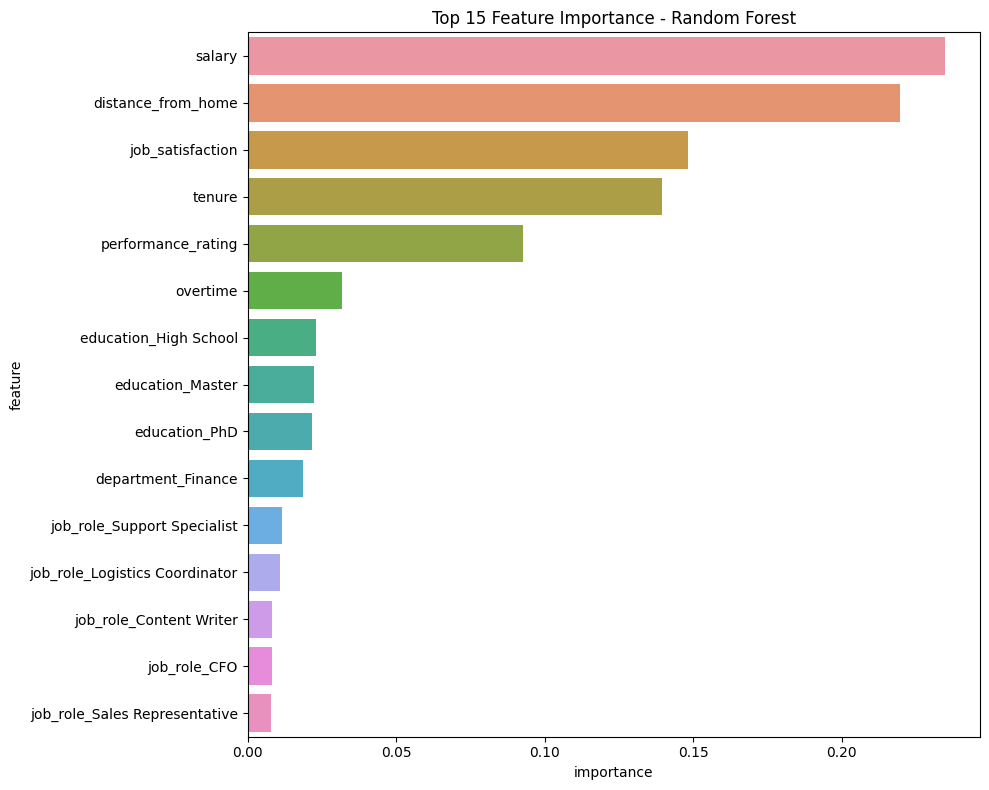

                  feature  importance
1                  salary      0.2349
4      distance_from_home      0.2196
2        job_satisfaction      0.1484
0                  tenure      0.1397
3      performance_rating      0.0929
5                overtime      0.0318
12  education_High School      0.0231
13       education_Master      0.0224
14          education_PhD      0.0217
6      department_Finance      0.0188

📈 Model Evaluation Visualizations:


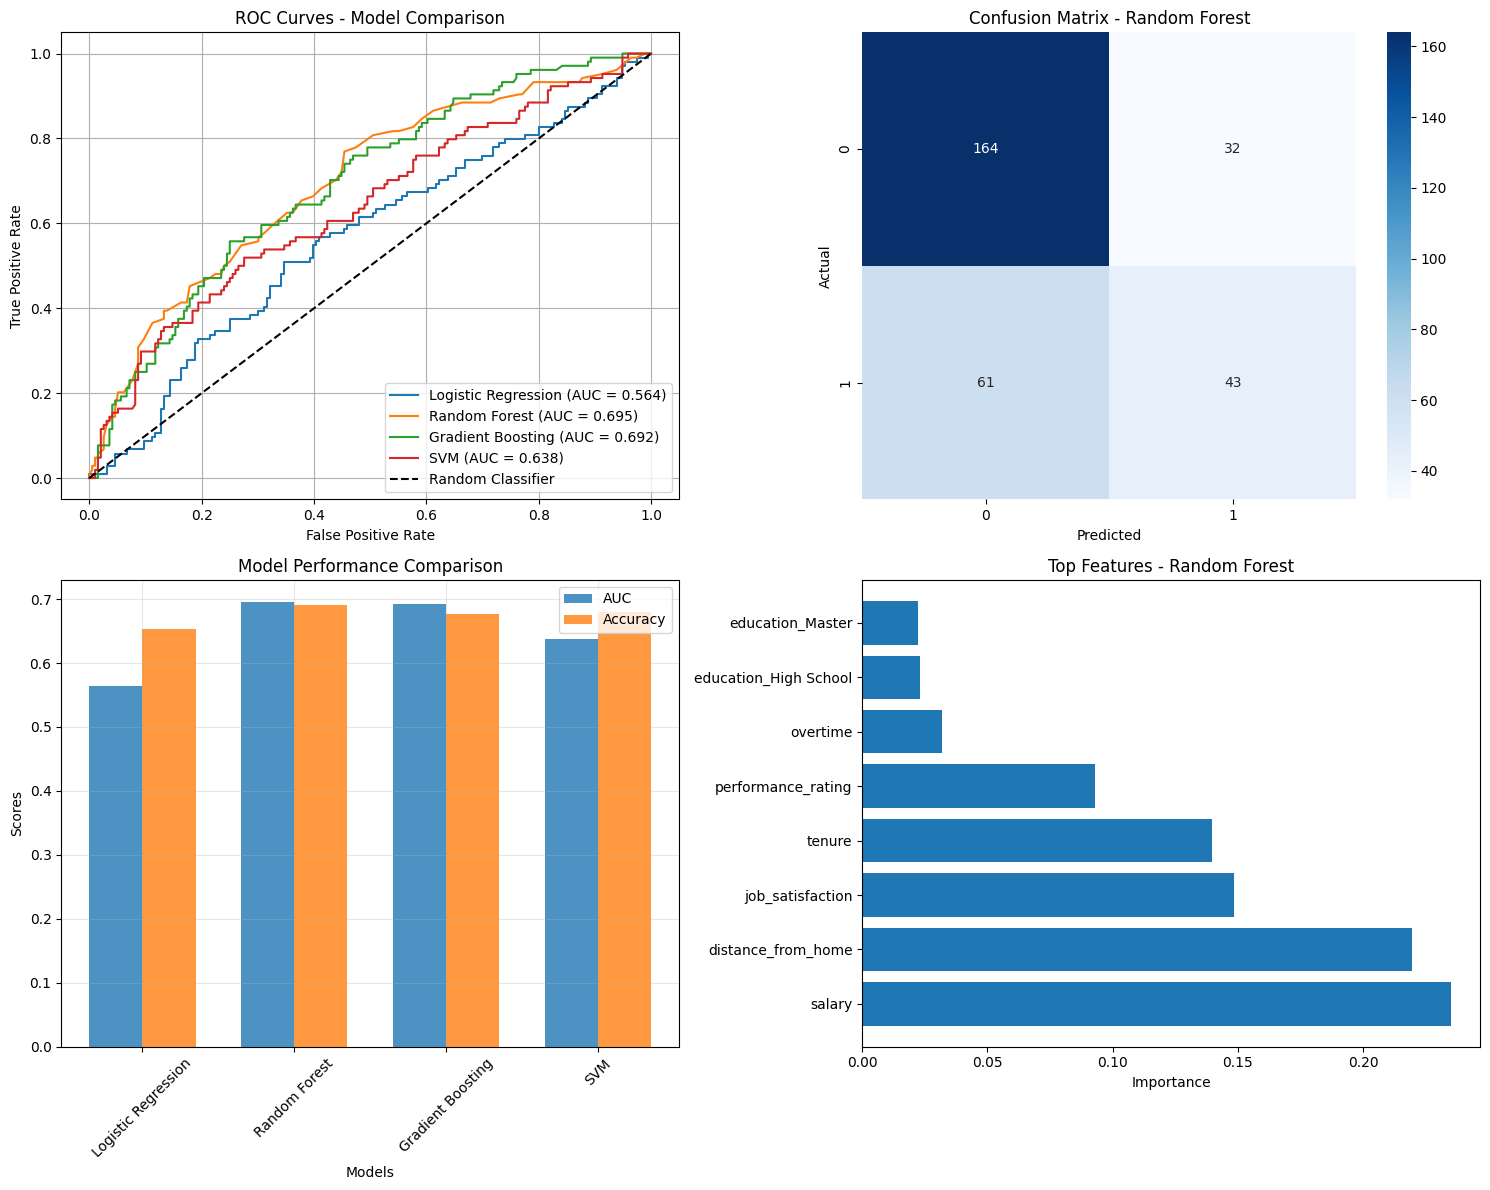


💡 Business Insights from Predictive Model:

🎯 Employee Risk Assessment:

Attrition Risk Distribution:
  Low Risk: 758 employees (50.5%)
  Medium Risk: 239 employees (15.9%)
  High Risk: 305 employees (20.3%)
  Very High Risk: 184 employees (12.3%)

🔴 High/Very High Risk Employees: 489

High-Risk Employee Profile:
  Average Salary: $82,467
  Average Job Satisfaction: 2.4/4
  Overtime Percentage: 36.0%
  Top Departments: {'Customer Service': 77, 'Operations': 68, 'Technology': 64}

💰 Cost-Benefit Analysis:
Average Salary: $90,875
Estimated attrition cost per employee: $45,438
Potential savings by retaining high-risk employees: $22,218,978

🛡️ Recommended Intervention Strategy:

1. **Targeted Retention Programs**
   - Focus on High/Very High risk employees
   - Department-specific initiatives for high-attrition areas

2. **Compensation Review**
   - Address salary gaps for high-risk employees
   - Consider bonus adjustments for key performers

3. **Work-Life Balance**
   - Reduce overtim

In [3]:
# HR Analytics - Attrition Prediction and Advanced Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

warnings.filterwarnings("ignore")

# Add shared modules to path
import sys

# sys.path.append("../../shared")
# from shared.utils.helpers import setup_plotting

# # Setup plotting style
# setup_plotting()

print("🎯 HR Analytics - Attrition Prediction and Advanced Analysis")
print("=" * 70)

# Load cleaned data
print("\n📥 Loading cleaned data...")

employees = pd.read_csv("../../data/processed/employees_clean.csv")
print(f"✅ Loaded: {len(employees)} employees")

# Data Preparation for Machine Learning
print("\n🔧 Preparing Data for Machine Learning...")
print("=" * 50)

# Create a copy for modeling
df_model = employees.copy()

# Convert target variable
df_model["attrition_flag"] = (df_model["attrition"] == "Yes").astype(int)

# Select features for modeling
feature_columns = [
    "age",
    "tenure",
    "salary",
    "bonus",
    "job_satisfaction",
    "performance_rating",
    "distance_from_home",
    "overtime",
    "department",
    "job_role",
    "education",
    "education_field",
    "gender",
    "marital_status",
]

# Prepare feature matrix and target
X = df_model[feature_columns]
y = df_model["attrition_flag"]

print(f"Features: {len(feature_columns)}")
print(f"Target distribution: {y.value_counts().to_dict()}")
print(f"Attrition rate: {y.mean():.2%}")

# Preprocessing: Handle categorical variables
print("\n🔧 Preprocessing Data...")

# One-hot encoding for categorical variables
categorical_columns = [
    "department",
    "job_role",
    "education",
    "education_field",
    "gender",
    "marital_status",
]
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Convert overtime to binary
X_encoded["overtime"] = (X_encoded["overtime"] == "Yes").astype(int)

print(f"Feature matrix shape after encoding: {X_encoded.shape}")

# Feature Selection
print("\n🎯 Feature Selection...")
print("=" * 40)

# Use SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_encoded, y)

# Get selected feature names
selected_features = X_encoded.columns[selector.get_support()]
print(f"Selected {len(selected_features)} most important features:")
for feature in selected_features:
    print(f"  - {feature}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Positive class in training: {y_train.mean():.2%}")
print(f"Positive class in test: {y_test.mean():.2%}")

# Model Training
print("\n🤖 Training Machine Learning Models...")
print("=" * 50)

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42, probability=True),
}

# Store model results
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    accuracy = (y_pred == y_test).mean()

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

    model_results[name] = {
        "model": model,
        "auc": auc_score,
        "accuracy": accuracy,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "y_pred_proba": y_pred_proba,
        "y_pred": y_pred,
    }

    print(f"  AUC: {auc_score:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Model Comparison
print("\n📊 Model Comparison:")
print("=" * 40)

results_df = pd.DataFrame(
    {
        "Model": list(models.keys()),
        "AUC": [result["auc"] for result in model_results.values()],
        "Accuracy": [result["accuracy"] for result in model_results.values()],
        "CV_AUC_Mean": [result["cv_mean"] for result in model_results.values()],
        "CV_AUC_Std": [result["cv_std"] for result in model_results.values()],
    }
).sort_values("AUC", ascending=False)

print(results_df.round(4))

# Best Model Analysis
best_model_name = results_df.iloc[0]["Model"]
best_model = model_results[best_model_name]["model"]
print(f"\n🏆 Best Model: {best_model_name}")

# Feature Importance for Tree-based Models
if hasattr(best_model, "feature_importances_"):
    print("\n🔍 Feature Importance (Best Model):")

    feature_importance = pd.DataFrame(
        {"feature": selected_features, "importance": best_model.feature_importances_}
    ).sort_values("importance", ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), y="feature", x="importance")
    plt.title(f"Top 15 Feature Importance - {best_model_name}")
    plt.tight_layout()
    plt.savefig(
        "../dashboards/plots/feature_importance.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

    print(feature_importance.head(10).round(4))

# Model Evaluation Visualizations
print("\n📈 Model Evaluation Visualizations:")
print("=" * 45)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC Curves
for name, result in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, result["y_pred_proba"])
    axes[0, 0].plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')

axes[0, 0].plot([0, 1], [0, 1], "k--", label="Random Classifier")
axes[0, 0].set_xlabel("False Positive Rate")
axes[0, 0].set_ylabel("True Positive Rate")
axes[0, 0].set_title("ROC Curves - Model Comparison")
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Confusion Matrix for Best Model
best_y_pred = model_results[best_model_name]["y_pred"]
cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")
axes[0, 1].set_title(f"Confusion Matrix - {best_model_name}")

# 3. Model Performance Comparison
models_list = list(models.keys())
auc_scores = [result["auc"] for result in model_results.values()]
accuracy_scores = [result["accuracy"] for result in model_results.values()]

x = np.arange(len(models_list))
width = 0.35

axes[1, 0].bar(x - width / 2, auc_scores, width, label="AUC", alpha=0.8)
axes[1, 0].bar(x + width / 2, accuracy_scores, width, label="Accuracy", alpha=0.8)
axes[1, 0].set_xlabel("Models")
axes[1, 0].set_ylabel("Scores")
axes[1, 0].set_title("Model Performance Comparison")
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_list, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance (if available)
if hasattr(best_model, "feature_importances_"):
    top_features = feature_importance.head(8)
    axes[1, 1].barh(range(len(top_features)), top_features["importance"])
    axes[1, 1].set_yticks(range(len(top_features)))
    axes[1, 1].set_yticklabels(top_features["feature"])
    axes[1, 1].set_xlabel("Importance")
    axes[1, 1].set_title(f"Top Features - {best_model_name}")
else:
    axes[1, 1].text(
        0.5,
        0.5,
        "Feature Importance\nnot available\nfor this model",
        ha="center",
        va="center",
        transform=axes[1, 1].transAxes,
    )
    axes[1, 1].set_title("Feature Importance")

plt.tight_layout()
plt.savefig("../dashboards/plots/model_evaluation.png", dpi=300, bbox_inches="tight")
plt.show()

# Business Insights from Model
print("\n💡 Business Insights from Predictive Model:")
print("=" * 55)

# Risk Scoring for Current Employees
print("\n🎯 Employee Risk Assessment:")

# Use best model to predict probabilities for all employees
if hasattr(best_model, "predict_proba"):
    X_full = selector.transform(X_encoded)
    attrition_probabilities = best_model.predict_proba(X_full)[:, 1]

    df_model["attrition_probability"] = attrition_probabilities

    # Categorize risk levels
    df_model["risk_level"] = pd.cut(
        df_model["attrition_probability"],
        bins=[0, 0.2, 0.5, 0.8, 1],
        labels=["Low", "Medium", "High", "Very High"],
    )

    risk_distribution = df_model["risk_level"].value_counts().sort_index()
    print("\nAttrition Risk Distribution:")
    for level, count in risk_distribution.items():
        percentage = (count / len(df_model)) * 100
        print(f"  {level} Risk: {count} employees ({percentage:.1f}%)")

    # High-risk employees analysis
    high_risk = df_model[df_model["risk_level"].isin(["High", "Very High"])]
    print(f"\n🔴 High/Very High Risk Employees: {len(high_risk)}")

    if len(high_risk) > 0:
        print("\nHigh-Risk Employee Profile:")
        print(f"  Average Salary: ${high_risk['salary'].mean():,.0f}")
        print(
            f"  Average Job Satisfaction: {high_risk['job_satisfaction'].mean():.1f}/4"
        )
        print(f"  Overtime Percentage: {(high_risk['overtime'] == 'Yes').mean():.1%}")
        print(
            f"  Top Departments: {high_risk['department'].value_counts().head(3).to_dict()}"
        )

# Cost-Benefit Analysis
print("\n💰 Cost-Benefit Analysis:")
print("=" * 40)

# Calculate cost of attrition
avg_salary = df_model["salary"].mean()
attrition_cost_per_employee = avg_salary * 0.5  # 50% of salary as replacement cost
total_attrition_cost = attrition_cost_per_employee * len(high_risk)

print(f"Average Salary: ${avg_salary:,.0f}")
print(f"Estimated attrition cost per employee: ${attrition_cost_per_employee:,.0f}")
print(
    f"Potential savings by retaining high-risk employees: ${total_attrition_cost:,.0f}"
)

# Intervention Strategy
print("\n🛡️ Recommended Intervention Strategy:")
print("=" * 45)

print(
    """
1. **Targeted Retention Programs**
   - Focus on High/Very High risk employees
   - Department-specific initiatives for high-attrition areas

2. **Compensation Review**
   - Address salary gaps for high-risk employees
   - Consider bonus adjustments for key performers

3. **Work-Life Balance**
   - Reduce overtime for high-risk groups
   - Implement flexible work arrangements

4. **Career Development**
   - Create growth paths for stagnant employees
   - Provide training and upskilling opportunities

5. **Management Training**
   - Improve leadership in high-attrition departments
   - Enhance employee engagement practices
"""
)

# Save Model Results
print("\n💾 Saving Model Results...")

# Save predictions
df_model[["employee_id", "attrition_probability", "risk_level"]].to_csv(
    "../../data/processed/employee_risk_scores.csv", index=False
)

# Save model performance
results_df.to_csv("../../data/processed/model_performance.csv", index=False)
print("✅ Model results saved to ../data/processed/")

print("\n🎉 Attrition Analysis Completed Successfully!")
print("\n📚 Next Steps:")
print("1. Review SQL queries for business intelligence")
print("2. Build interactive dashboard with risk scores")
print("3. Implement ETL pipeline for automation")
print("4. Develop business recommendations report")